<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Overview</a></span></li><li><span><a href="#Business-Challenge" data-toc-modified-id="Business-Challenge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Challenge</a></span></li><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Investigating-Correlations-with-Response-Variable" data-toc-modified-id="Investigating-Correlations-with-Response-Variable-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Investigating Correlations with Response Variable</a></span></li></ul></div>

# Project Overview

In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, include YouTube Red, Pandora Premium, Audible Subscription and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with their offers and promotions.

- **Market:** The target audience is customers who use a company's free product. For this project, this refers to users who installed (and used) the company's free mobile app.
- **Product:** The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, YouTube Red allows you to leave the app while still listening to a video.
- **Goal:** The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to "convert" them to paid users.

# Business Challenge

The data comes from a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked. 

We will identify which users will most likely **NOT** enroll in a paid product, so that additional offers can be given to them. Due to the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

# Data Overview

We have access to the each customer's app behaviour data. This data allows us to see the date and time of app installation, as well as the features the user engaged with in the app. App behaviour is characterised as the list of app screens the user looked at and whether the user played the financial mini-games available. 

The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features and the company wants to target them with new offers shortly after the trial is over.

The data fields  we'll be working with are as follows:

- `first_open`: The datetime when the user first opened the app
- `dayofweek`: the integer day of the week when the user first opened the app. Starts at 0, which is Sunday and runs to 6 which is Saturday. 
- `hour`: Hour of the day when user first opened app. in 24 hours format as 18:00:00. Correlates with `dayofweek`.
- `age`: Age of the user.
- `screen_list`: Comma-seperated list of screens that the users accessed in their first 24 hours.
- `numscreens`: The number of screens accessed in their first 24 hours.
- `liked`: Each screen has an feature to 'like' that particualr screen. If any screens are liked, this value will be 1, otherwise 0.
- `minigame`: 1 if the user played the mini-game, 0 otherwise.
- `used_premium_feature`: 1 if the user accessed any of the premium features in the first 24 hours, 0 otherwise.
- `enrolled`: 1 if the user enrolled, 0 otherwise. This is the field that will be predicted later.
- `enrolled_date`: If the user enrolled at any time, this value is popopulated with the date of enrollment.

# Data Prep

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [46]:
df = pd.read_csv('data/appdata10.csv')

In [47]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [48]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


Let's convert hour to a numerical value.

In [50]:
df["hour"] = df.hour.str.slice(1, 3).astype(int)

In [51]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df2 = df.copy().drop(['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'], axis=1)

In [53]:
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Histograms

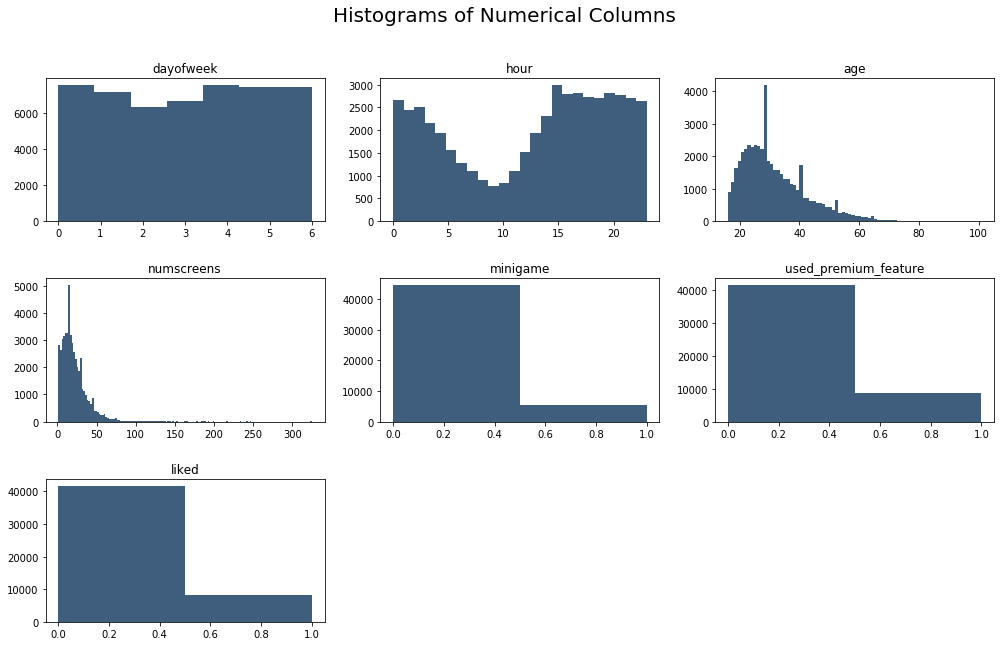

In [54]:
plt.figure(figsize=(17,10))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df2.columns.values[i-1])
    
    # determine the number of unique values in each column
    vals = np.size(df2.iloc[:, i-1].unique())
    # number of bins equals the number of unique values for each column
    plt.hist(df2.iloc[:, i-1], bins=vals, color='#3F5D7D')

plt.subplots_adjust(hspace=0.4)    

Findings:

- Not a huge preference singing up on a specific day.
- Hour is in UTC time so the major dip we see represents sleeping time for most people.  
- Most signups tends to be from younger people (right-skewed age) with a few big spikes around 30, 40 and 50. 
- A few outliers access a large number of screens but generally most people access less than 25 screens.
- Most people do not play the mini game or use premium features. 
- Most people have not liked any of the app features. 

# Investigating Correlations with Response Variable

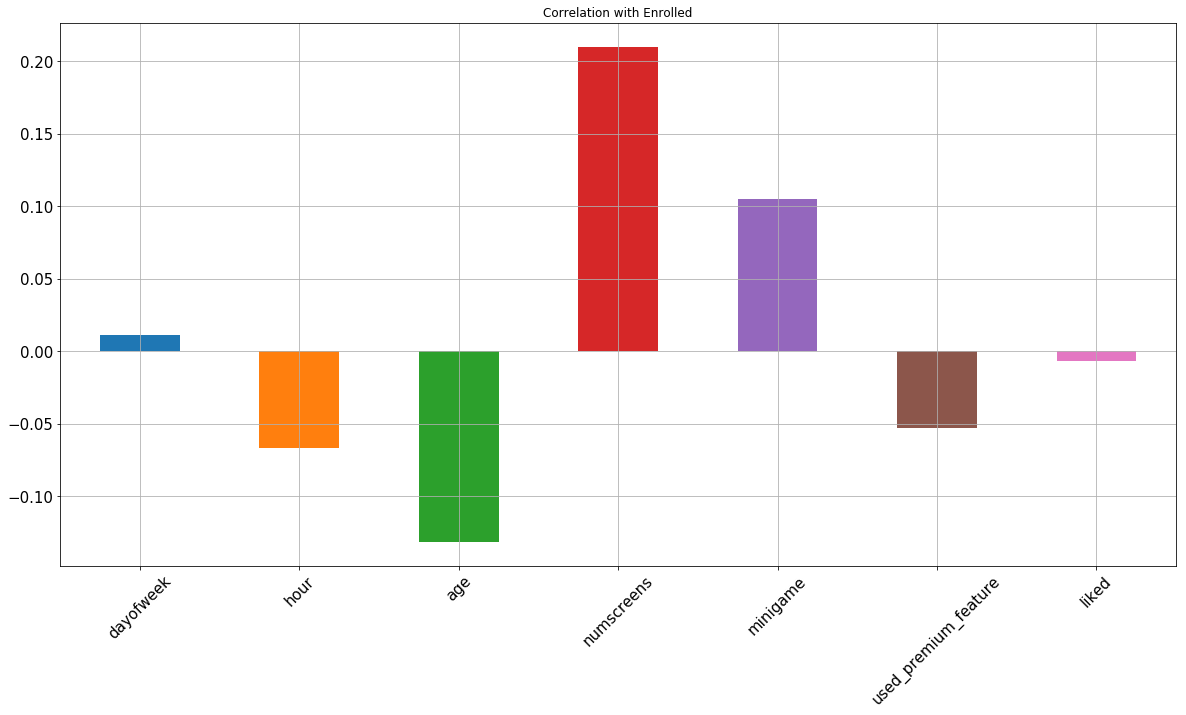

In [64]:
df2.corrwith(df.enrolled).plot.bar(figsize=(20, 10), 
                                  title='Correlation with Enrolled',
                                 fontsize=15, 
                                 rot=45, grid=True)

Findings:

- Older people tend to sign up less.
- The more screens someone used, the more likely they are to sign up.
- People playing the mini-game tend to sign up, however it's a weak poositive correlation.
- People who use the app at earlier hours tend to sign up less, however it's a very weak naegative correlation.
- The more people use premium features, the less likely they are to enrol, however it's a very weak negative correlation.
- Whether users like a feature or not seems to have no correlation on whether they sign up or not. 

We need to plot these correlations with a scatter plot as these correlation values only represent linear relationships and there may be a more complex association that we can only see on a scatterplot.